## import pandas for data analysis
## import seaborn for heat map plot

In [8]:
import pandas as pd
import seaborn as sns
data=pd.read_csv("weather.csv")

In [3]:
data.head()

,date,time,temp,wspeed,/h,wdirection,humidity,pressure,mbar,visibility,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1-Jan-2020,01:00,5,4.0,/h,↑,87%,1019,mbar,4.0,NaN,NaN,NaN
1,1-Jan-2020,02:00,5,4.0,/h,↑,87%,1019,mbar,4.0,NaN,NaN,NaN
2,1-Jan-2020,03:00,5,4.0,/h,↑,87%,1019,mbar,3.0,NaN,NaN,NaN
3,1-Jan-2020,04:00,4,0.0,/h,↑,87%,1019,mbar,4.0,NaN,NaN,NaN
4,1-Jan-2020,05:00,4,0.0,/h,↑,93%,1018,mbar,4.0,NaN,NaN,NaN


## see first five rows in the file

In [321]:
data.dtypes

date            object
time            object
temp             int64
wspeed         float64
/h              object
wdirection      object
humidity        object
pressure        object
mbar            object
visibility     float64
Unnamed: 10    float64
Unnamed: 11    float64
Unnamed: 12    float64
dtype: object

In [9]:
data=data[ data.date.str.contains("Jan")]
data.dtypes
# data.groupby( data.date.str.contains("Mar","Jan")).mean().plot()


date            object
time            object
temp             int64
wspeed         float64
/h              object
wdirection      object
humidity        object
pressure        object
mbar            object
visibility     float64
Unnamed: 10    float64
Unnamed: 11    float64
Unnamed: 12    float64
dtype: object

In [309]:
data=pd.read_csv("weather.csv")

In [201]:
x=pd.to_datetime(data.date +" "+ data.time).head(189)


In [10]:
# data=data.astype({"date":"datetime64"}).dtypes
data["date"]=(pd.to_datetime(data["date"])).dt.date
# data["time"]=pd.to_datetime(data["time"]).apply(lambda x:x.replace(minute=0))
# data["time"]=pd.to_datetime(data["time"]).dt.floor("Min")
# data.time.dt.minute.head(189)
# data.time.replace(hour=1,minute=0,second="")

In [325]:
data.time.head(189)

0      01:00
1      02:00
2      03:00
3      04:00
4      05:00
       ...  
184    13:00
185    14:00
186    15:00
187    16:00
188    17:00
Name: time, Length: 189, dtype: object

In [11]:
# pd.concat([data.time.dt.hour,data.time.dt.minute],join="inner").tail()
data.time=data.time.str.replace(r":.*",":00")

/tmp/ipykernel_2352/3835385887.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.time=data.time.str.replace(r":.*",":00")


In [12]:
import matplotlib.pyplot as plt
data.head(189)

,date,time,temp,wspeed,/h,wdirection,humidity,pressure,mbar,visibility,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2020-01-01,01:00,5,4.0,/h,↑,87%,1019,mbar,4.0,NaN,NaN,NaN
1,2020-01-01,02:00,5,4.0,/h,↑,87%,1019,mbar,4.0,NaN,NaN,NaN
2,2020-01-01,03:00,5,4.0,/h,↑,87%,1019,mbar,3.0,NaN,NaN,NaN
3,2020-01-01,04:00,4,0.0,/h,↑,87%,1019,mbar,4.0,NaN,NaN,NaN
4,2020-01-01,05:00,4,0.0,/h,↑,93%,1018,mbar,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2020-01-08,13:00,8,37.0,/h,↑,66%,1013,mbar,3.0,NaN,NaN,NaN
185,2020-01-08,14:00,8,28.0,/h,↑,71%,1012,mbar,4.0,NaN,NaN,NaN
186,2020-01-08,15:00,8,26.0,/h,↑,71%,1012,mbar,2.0,NaN,NaN,NaN
187,2020-01-08,16:00,8,33.0,/h,↑,71%,1012,mbar,2.0,NaN,NaN,NaN


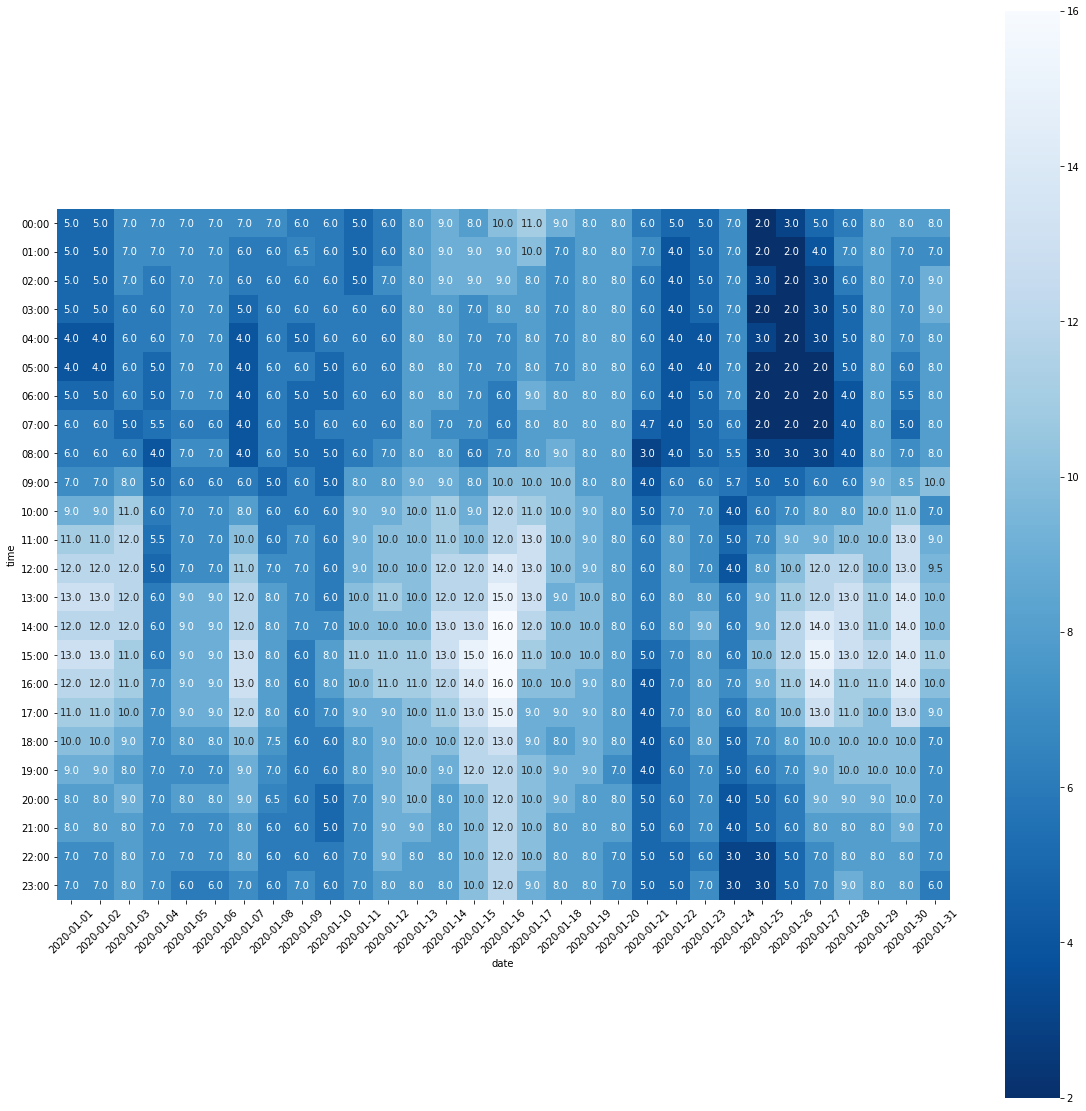

In [49]:
# data[::-1].head()
# data.dtypes
# pivot_i=data[["date","time","temp"]]
# pivot_i.dtypes
# data["time"]=data.time.dt.hour
pivot_i=(data.pivot_table(index="time",columns="date",values="temp"))
# pivot_i.isnull().sum()
# pivot_i.isna().sum().sum()
pivot_i.fillna(method="bfill",inplace=True)
# pivot_i=x[["dt.date","dt.hour"]]
# pivot_i.sortlevel(["date"],ascending=False,sort_remaining=False,inplace=True)
# pivot_i.sort_values("date",ascending=False).head()
# dd.describe()
# pivot_i.sort_index(level=0,ascending=False,inplace=True)
# pivot_i.sort_values(by=["date"])
fig,ax=plt.subplots(figsize=(20,20))

x=sns.heatmap(pivot_i,annot=True,fmt=".1f",square=True,cmap="Blues_r",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()
xf.savefig("20*20.png",dpi=400)

In [15]:
plt=data.groupby("date").temp.mean()
plt.head()
# y=data.groupby("temp").temp.plot()
# y.get_group(y.time).plot()

date
1-Feb-2020     7.583333
1-Jan-2020     8.217391
1-Mar-2020     9.333333
10-Feb-2020    2.600000
10-Jan-2020    5.960000
Name: temp, dtype: float64

In [16]:
sns.heatmap(plt,annot=True,fmt=".1f")

IndexError: Inconsistent shape between the condition and the input (got (66, 1) and (66,))

In [81]:
import numpy as np

In [17]:
sns.heatmap(plt,linewidth=0.005,cmap="flare")

IndexError: Inconsistent shape between the condition and the input (got (66, 1) and (66,))